                                time   magnitude   longitude    latitude  \
count                            492  492.000000  492.000000  492.000000   
mean   2023-08-15 07:29:14.622050560    4.800772   24.556356   -0.017742   
min       2023-08-01 02:20:46.066000    4.500000 -179.931400  -62.177500   
25%    2023-08-07 00:07:31.091749888    4.500000  -75.063325  -21.994050   
50%    2023-08-15 00:00:27.827500032    4.700000   70.097650   -1.305250   
75%    2023-08-22 19:23:30.149750016    4.900000  129.117575   21.743200   
max       2023-08-31 21:43:25.888000    7.100000  179.899300   83.475200   
std                              NaN    0.375329  119.982102   29.960864   

            depth  
count  492.000000  
mean    73.788683  
min      2.963000  
25%     10.000000  
50%     25.064500  
75%     71.293500  
max    646.537000  
std    125.042290  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column     Non-Null Count 

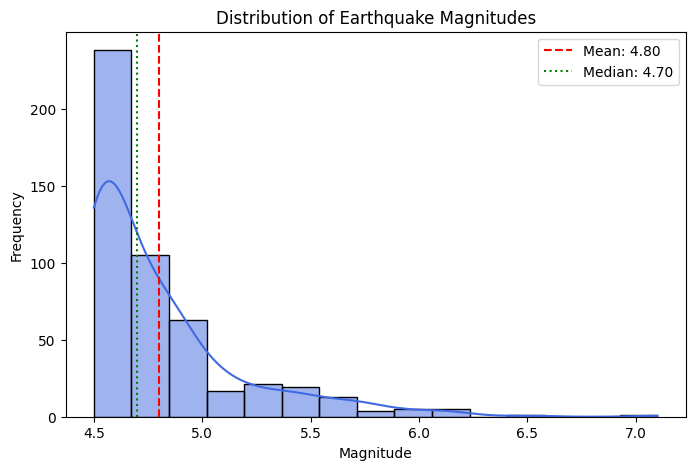

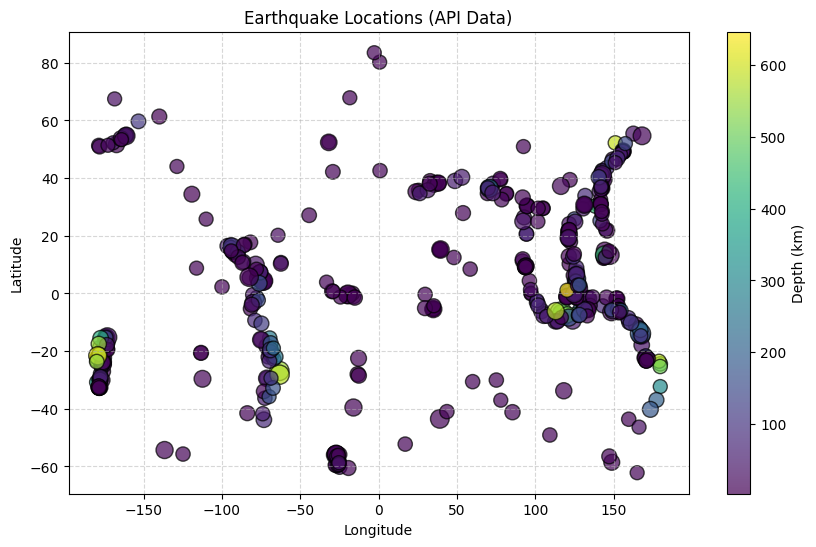

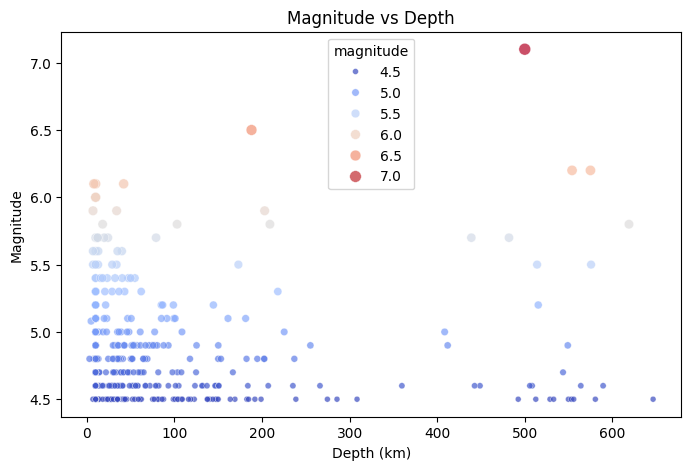

In [10]:
#Seismic Sensor API
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch earthquake data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2023-08-01",
    "endtime": "2023-09-01",
    "minmagnitude": 4.5
}
response = requests.get(url, params=params).json()

records = []
for feat in response['features']:
    props = feat['properties']
    geom = feat['geometry']
    records.append({
        "time": pd.to_datetime(props['time'], unit='ms'),
        "place": props['place'],
        "magnitude": props['mag'],
        "longitude": geom['coordinates'][0],
        "latitude": geom['coordinates'][1],
        "depth": geom['coordinates'][2]
    })
df_api = pd.DataFrame(records)

print(df_api.describe())
print(df_api.info())

plt.figure(figsize=(8,5))
sns.histplot(df_api['magnitude'], bins=15, kde=True, color="royalblue")
plt.axvline(df_api['magnitude'].mean(), color='red', linestyle='--', label=f"Mean: {df_api['magnitude'].mean():.2f}")
plt.axvline(df_api['magnitude'].median(), color='green', linestyle=':', label=f"Median: {df_api['magnitude'].median():.2f}")
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
sc = plt.scatter(df_api['longitude'], df_api['latitude'],
                 s=df_api['magnitude']**2 * 5,
                 c=df_api['depth'], cmap="viridis", alpha=0.7, edgecolor="k")
plt.colorbar(sc, label="Depth (km)")
plt.title("Earthquake Locations (API Data)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(data=df_api, x="depth", y="magnitude", hue="magnitude", palette="coolwarm", size="magnitude", alpha=0.7)
plt.title("Magnitude vs Depth")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()




            Latitude      Longitude          Depth      Magnitude
count  148625.000000  148625.000000  148625.000000  148625.000000
mean        6.191036      46.015243      78.493427       4.932526
std        28.504138     119.966345     122.043805       0.434591
min       -83.902000    -179.999000      -2.540000       4.500000
25%       -15.037000     -70.425000      29.600000       4.600000
50%         1.839000     103.850000      33.000000       4.800000
75%        30.555000     142.471000      70.000000       5.100000
max        87.221000     179.999000     700.500000       9.100000
Missing values: Date         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
Location     0
dtype: int64


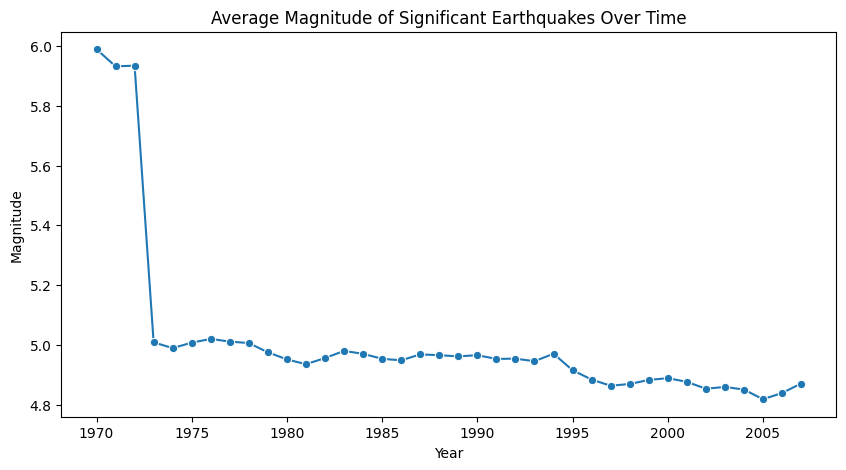

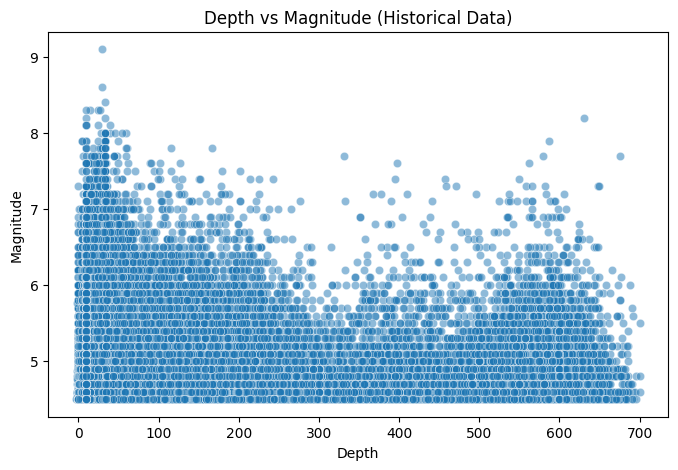

In [11]:
#Earthquake Historical Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load a historical dataset (Kaggle/NOAA/USGS archive)
df_hist = pd.read_csv("/content/consolidated_data.csv")

# Select & clean - using the correct column names from your dataset
df_hist = df_hist[['time', 'latitude', 'longitude', 'depth', 'mag', 'place']]
df_hist['time'] = pd.to_datetime(df_hist['time'], errors='coerce')
df_hist = df_hist.dropna()

df_hist = df_hist.rename(columns={
    'time': 'Date',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'depth': 'Depth',
    'mag': 'Magnitude',
    'place': 'Location'
})

df_hist = df_hist[df_hist['Magnitude'] >= 4.5]

print(df_hist.describe())
print("Missing values:", df_hist.isnull().sum())

# Time series trend
df_hist['Year'] = df_hist['Date'].dt.year
plt.figure(figsize=(10,5))
yearly_avg = df_hist.groupby('Year')['Magnitude'].mean().reset_index()
sns.lineplot(data=yearly_avg, x='Year', y='Magnitude', marker="o")
plt.title("Average Magnitude of Significant Earthquakes Over Time")
plt.show()

# Magnitude vs Depth
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_hist, x="Depth", y="Magnitude", alpha=0.5)
plt.title("Depth vs Magnitude (Historical Data)")
plt.show()


Setting CRS to EPSG:4326 (WGS84)
Soil data loaded successfully!
Columns: ['SNUM', 'FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2', 'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTCODE', 'CNTNAME', 'SQKM', 'COUNTRY', 'geometry']
Number of soil types: 34112
CRS: EPSG:4326

First few rows:
   SNUM FAOSOIL DOMSOI PHASE1 PHASE2 MISCLU1 MISCLU2 PERMAFROST  CNTCODE  \
0  3479  Rx1-2c     Rx   None   None       0       0          1       85   
1  6998      GL     GL   None   None       0       0          1       85   
2  6998      GL     GL   None   None       0       0          1       85   
3  6998      GL     GL   None   None       0       0          1       85   
4  3479  Rx1-2c     Rx   None   None       0       0          1       85   

  CNTNAME    SQKM    COUNTRY  \
0      GL  4194.0  GREENLAND   
1      GL  8798.0  GREENLAND   
2      GL   659.0  GREENLAND   
3      GL    69.0  GREENLAND   
4      GL   204.0  GREENLAND   

                                            geometry  
0  POLYGON ((-34.67598 

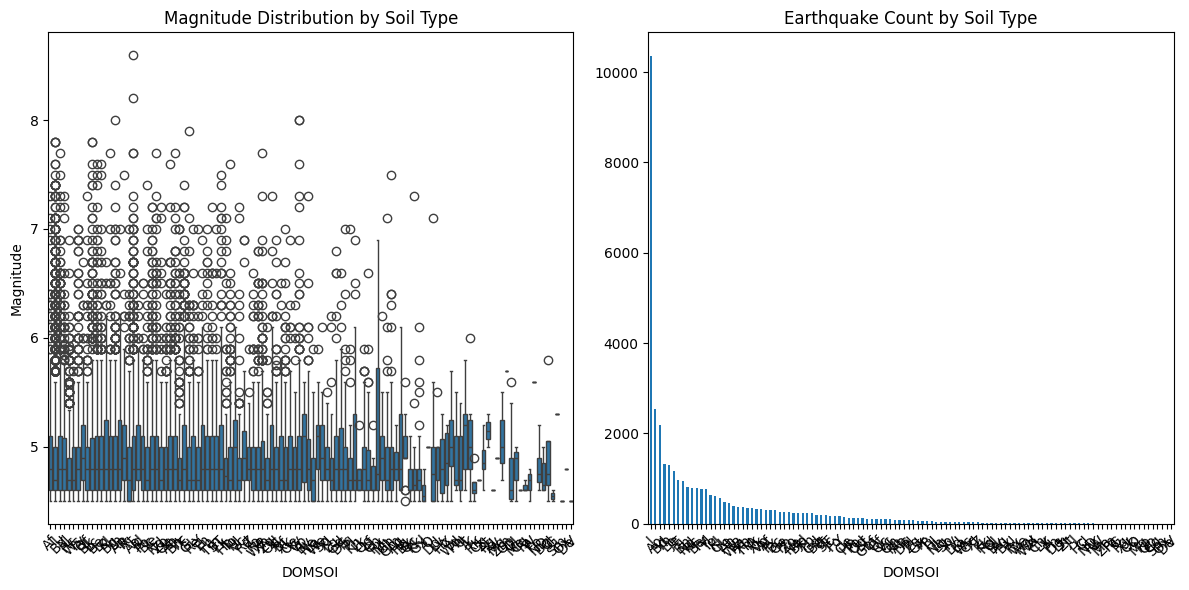

/tmp/ipython-input-1120823736.py:105: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


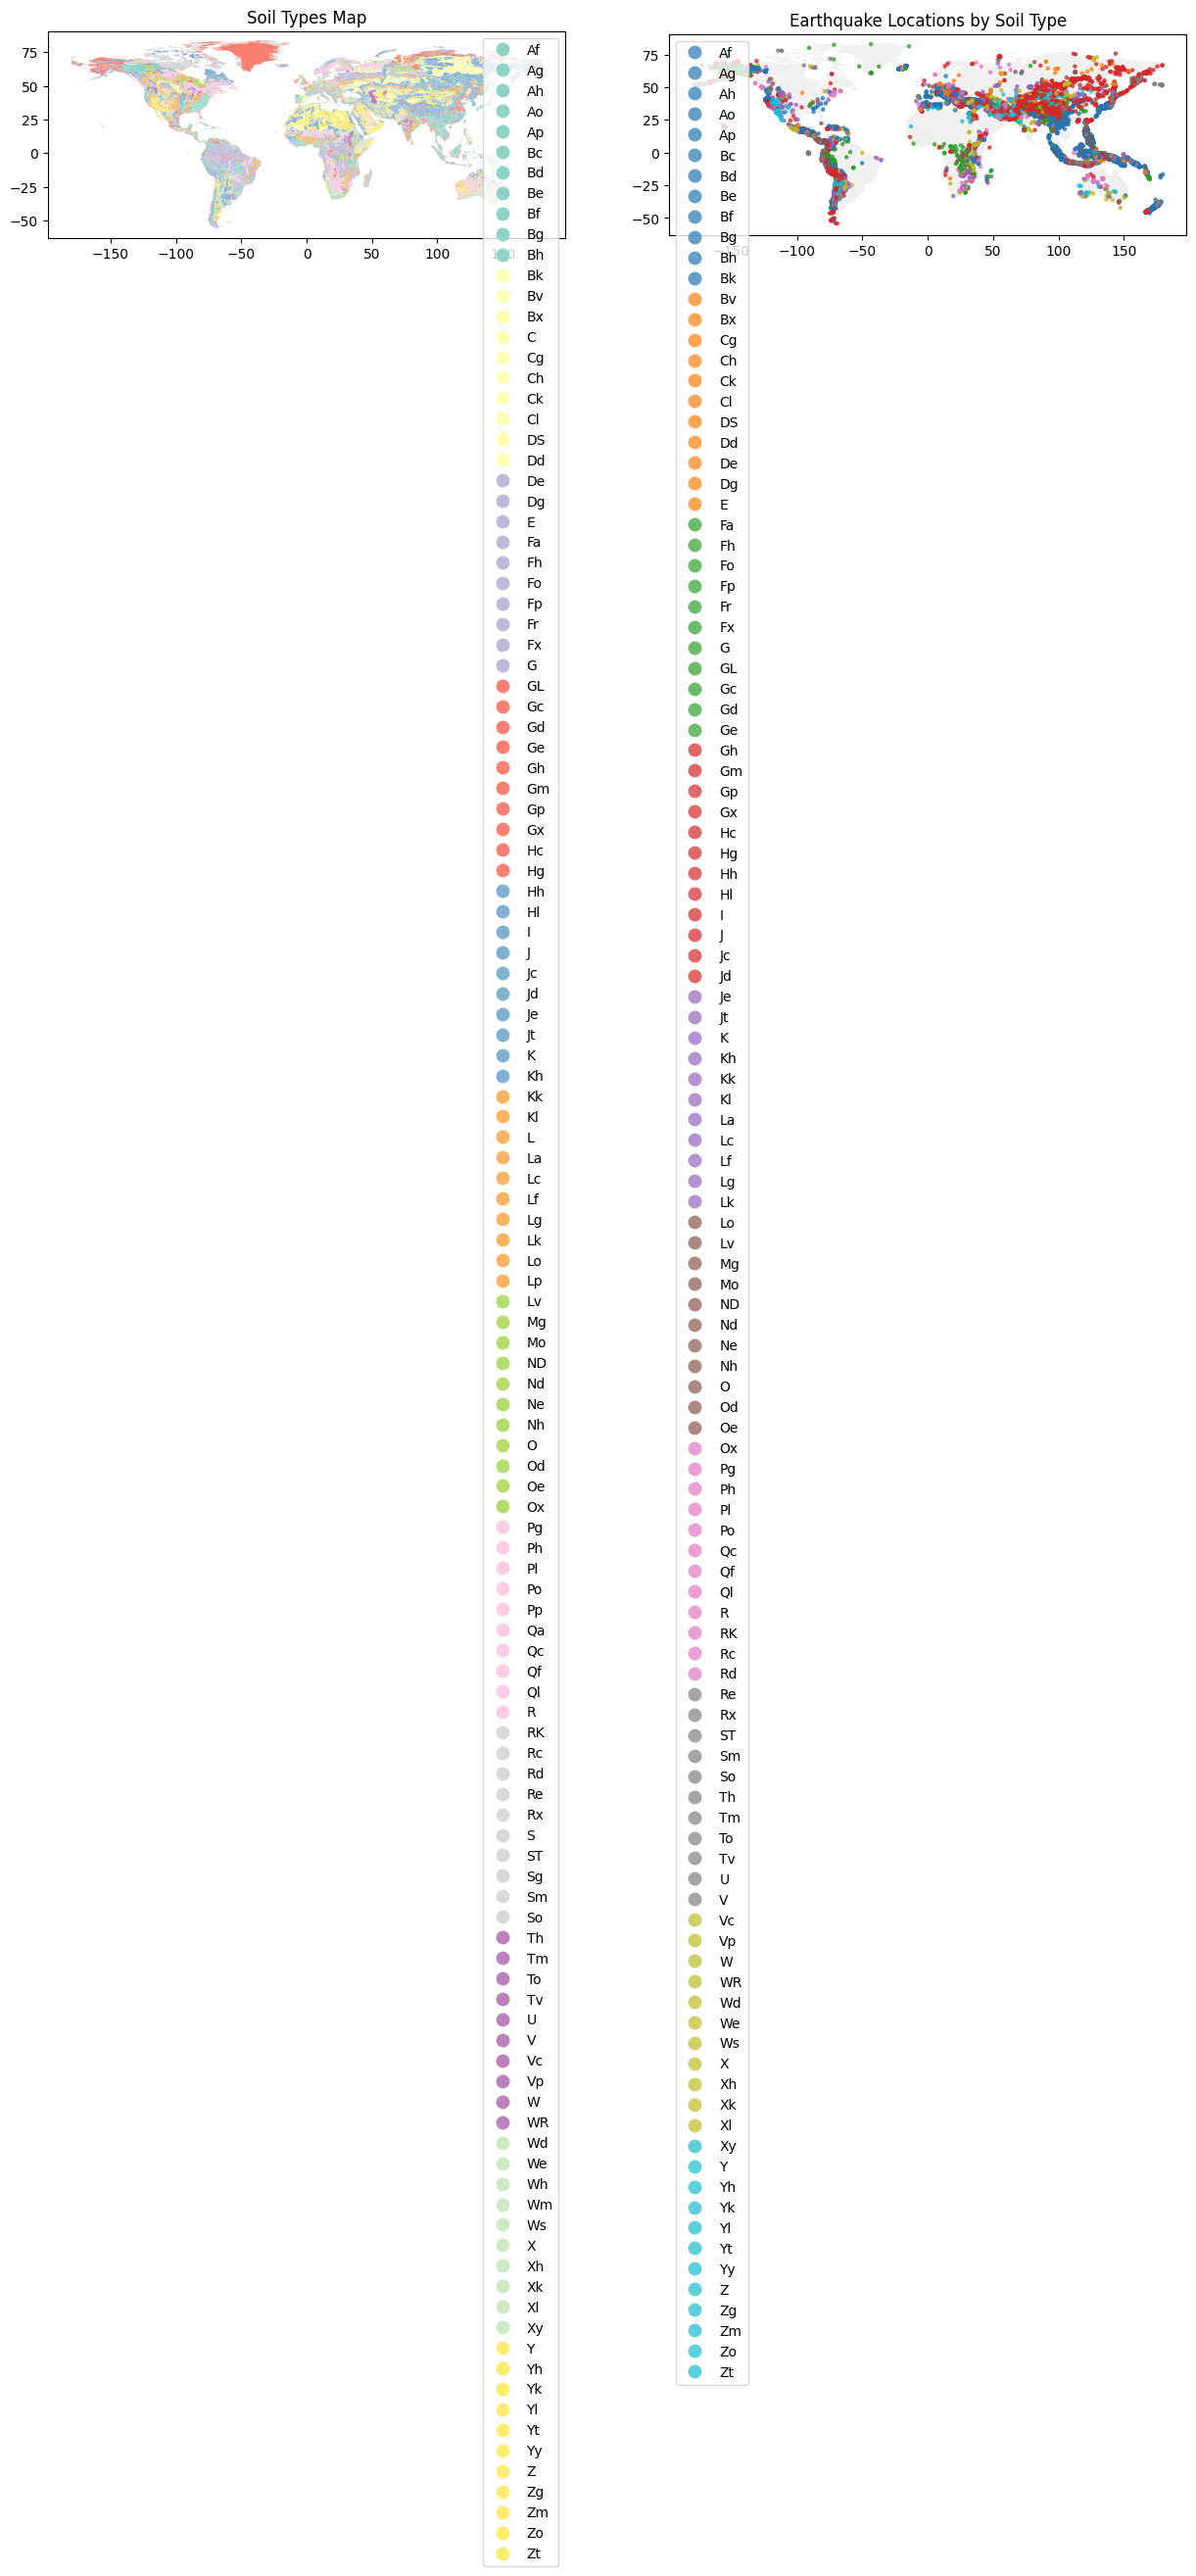


Statistical summary by soil type:
        count      mean       std  min  max
DOMSOI                                     
Af        312  4.914423  0.466240  4.5  7.3
Ag         19  4.842105  0.216835  4.5  5.2
Ah        466  4.921803  0.448881  4.5  7.6
Ao       2530  4.908435  0.432628  4.5  8.6
Ap         83  5.021687  0.543038  4.5  7.0
...       ...       ...       ...  ...  ...
Z          34  4.891176  0.296819  4.5  5.9
Zg         73  4.816438  0.310919  4.5  6.1
Zm          3  5.066667  0.404145  4.7  5.5
Zo        262  4.853053  0.406238  4.5  7.2
Zt          6  4.883333  0.204124  4.6  5.2

[114 rows x 5 columns]


In [12]:
#Soil Data
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from shapely.geometry import Point

def load_soil_data(shapefile_path):
    """Load soil data with error handling"""
    try:
        # Load the shapefile
        soil_data = gpd.read_file(shapefile_path)


        if soil_data.crs is None:
            soil_data = soil_data.set_crs("EPSG:4326")
            print("Setting CRS to EPSG:4326 (WGS84)")

        return soil_data

    except Exception as e:
        print(f"Error loading shapefile: {e}")
        return None

# Load soil data
soil_data = load_soil_data("/content/DSMW.shp")

if soil_data is not None:
    print("Soil data loaded successfully!")
    print(f"Columns: {soil_data.columns.tolist()}")
    print(f"Number of soil types: {len(soil_data)}")
    print(f"CRS: {soil_data.crs}")
    print("\nFirst few rows:")
    print(soil_data.head())

    # Check available columns for soil classification
    # Common column names in FAO DSMW:
    possible_soil_columns = ['SU_SYM90', 'DOMSOI', 'SU_SYM85', 'SOIL', 'CODE']
    available_soil_cols = [col for col in possible_soil_columns if col in soil_data.columns]
    print(f"\nAvailable soil columns: {available_soil_cols}")

    if available_soil_cols:
        soil_column = available_soil_cols[0]  # Using the first available soil column
        print(f"Using soil column: {soil_column}")

        # Convert earthquake data to GeoDataFrame
        eq_points = gpd.GeoDataFrame(
            df_hist,
            geometry=gpd.points_from_xy(df_hist.Longitude, df_hist.Latitude),
            crs="EPSG:4326"
        )

        # Ensure both datasets have the same CRS
        soil_data = soil_data.to_crs(eq_points.crs)

        print(f"Earthquake points: {len(eq_points)}")
        print(f"Soil polygons: {len(soil_data)}")

        # Spatial join - find which soil polygon contains each earthquake point
        eq_with_soil = gpd.sjoin(
            eq_points,
            soil_data[[soil_column, 'geometry']],
            how="left",
            predicate='within'
        )

        # Check results
        print(f"\nEarthquakes with soil data: {len(eq_with_soil)}")
        print(f"Earthquakes without soil data (NaN): {eq_with_soil[soil_column].isna().sum()}")

        # EDA Analysis
        print(f"\nSoil type distribution:")
        print(eq_with_soil[soil_column].value_counts())

        # Magnitude distribution by soil type
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(data=eq_with_soil, x=soil_column, y="Magnitude")
        plt.title("Magnitude Distribution by Soil Type")
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        soil_counts = eq_with_soil[soil_column].value_counts()
        soil_counts.plot(kind='bar')
        plt.title("Earthquake Count by Soil Type")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        # Map visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot 1: Soil map
        soil_data.plot(column=soil_column, ax=ax1, legend=True, cmap='Set3')
        ax1.set_title("Soil Types Map")

        # Plot 2: Earthquakes over soil types
        soil_data.plot(ax=ax2, color='lightgrey', alpha=0.3)
        eq_with_soil.plot(ax=ax2, column=soil_column, legend=True,
                         markersize=5, alpha=0.7)
        ax2.set_title("Earthquake Locations by Soil Type")

        plt.tight_layout()
        plt.show()

        # Statistical summary
        print("\nStatistical summary by soil type:")
        stats_by_soil = eq_with_soil.groupby(soil_column)['Magnitude'].agg(['count', 'mean', 'std', 'min', 'max'])
        print(stats_by_soil)

    else:
        print("No standard soil classification columns found.")
        print("Available columns:", soil_data.columns.tolist())

else:
    print("Failed to load soil data.")

    # Debug: Check if files are accessible
    dataset_dir = "/content/DSMW.shx"
    if os.path.exists(dataset_dir):
        files = os.listdir(dataset_dir)
        print(f"Files in directory: {files}")
    else:
        print(f"Directory does not exist: {dataset_dir}")


Missing values per column:
Date                0
Latitude            0
Longitude           0
Depth               0
Magnitude           0
Location            0
Year                0
geometry            0
index_right    112237
DOMSOI         112237
dtype: int64


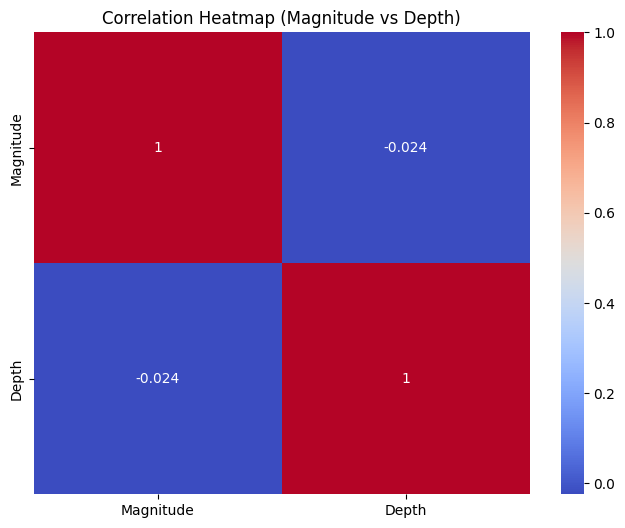

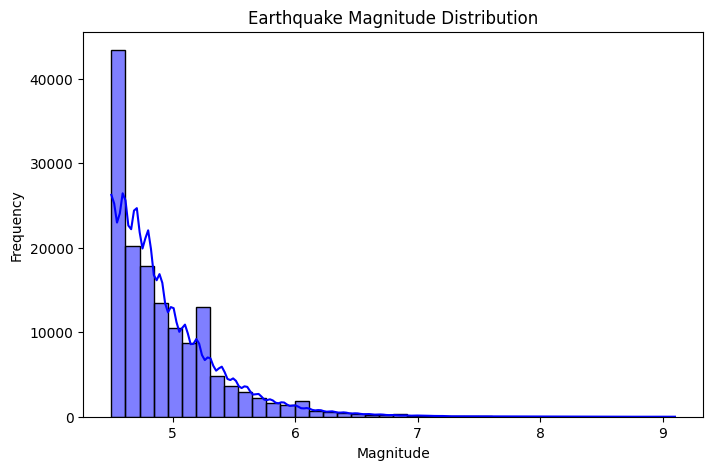

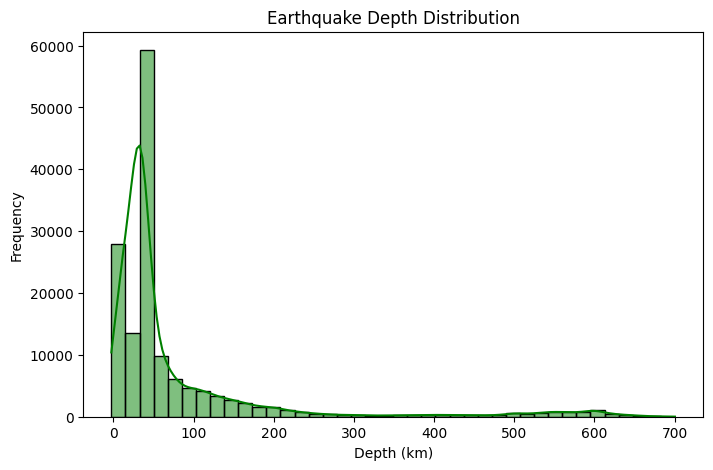

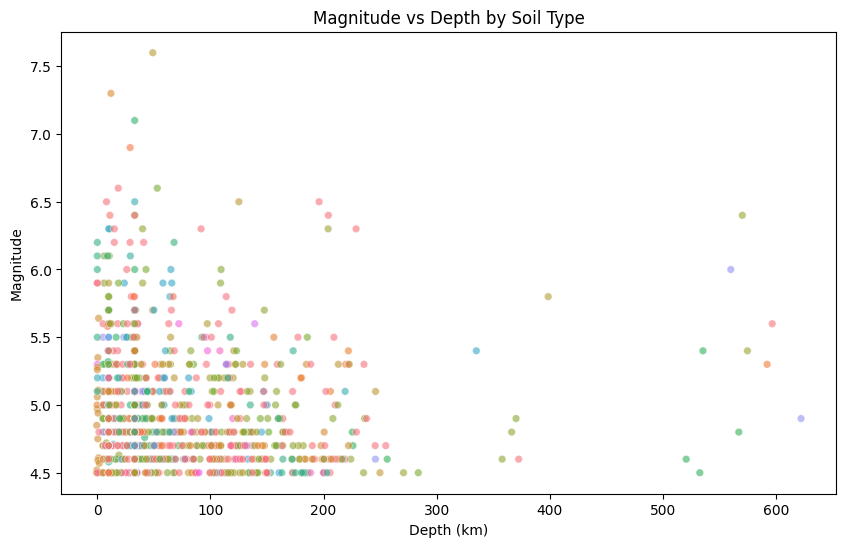

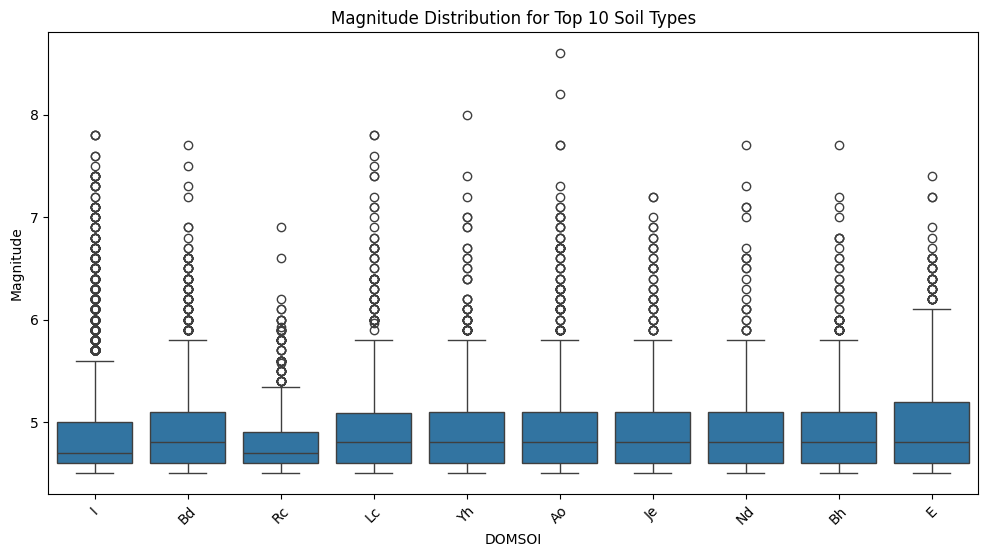

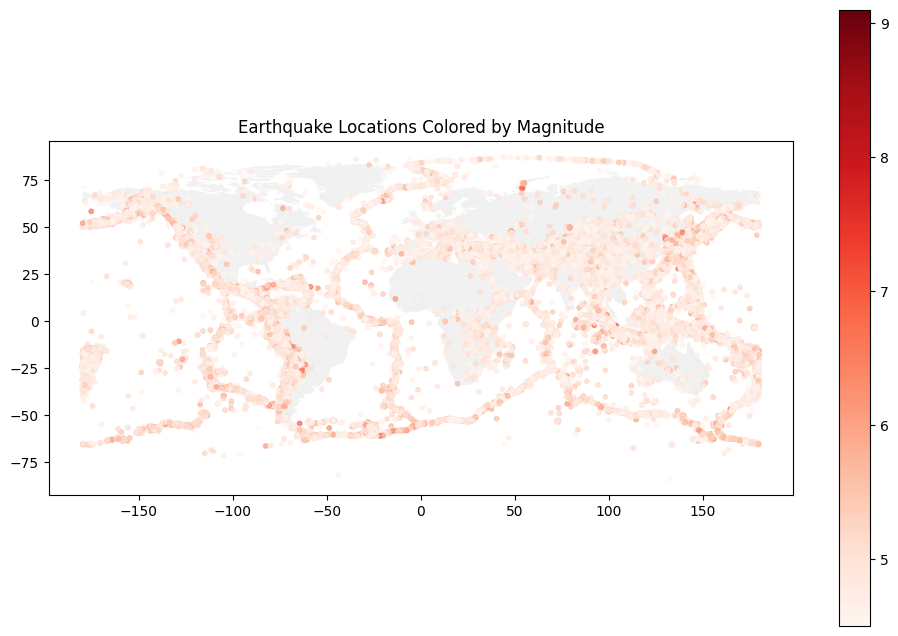

/tmp/ipython-input-2643866979.py:70: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  eq_with_soil.set_index('Date').resample('M')['Magnitude'].count().plot()


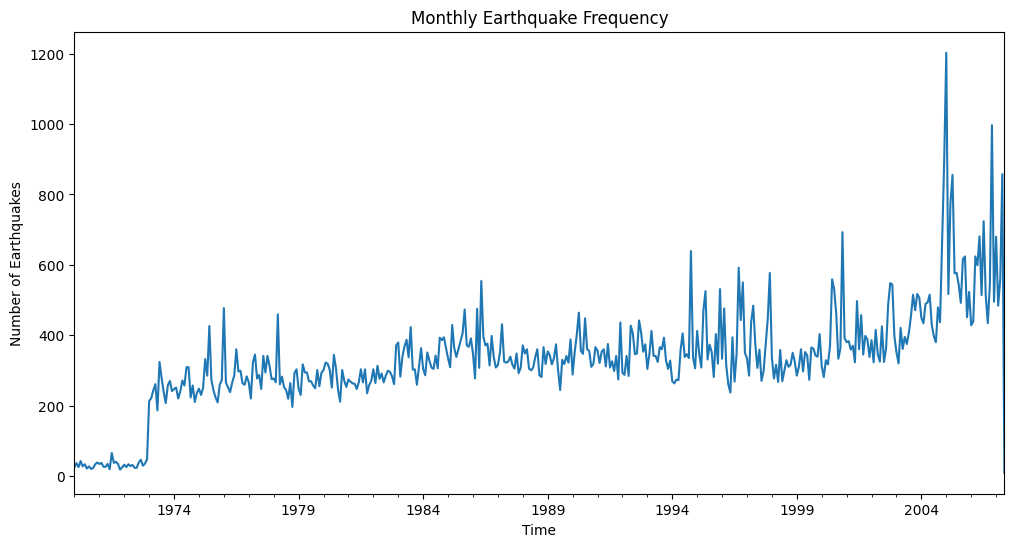

/tmp/ipython-input-2643866979.py:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  eq_with_soil.set_index('Date').resample('M')['Magnitude'].mean().plot(color="red")


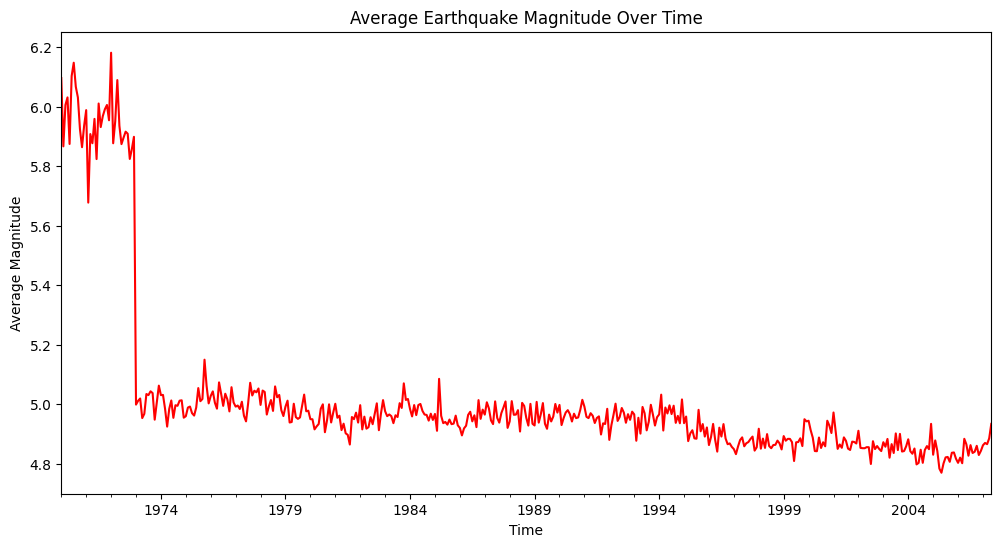

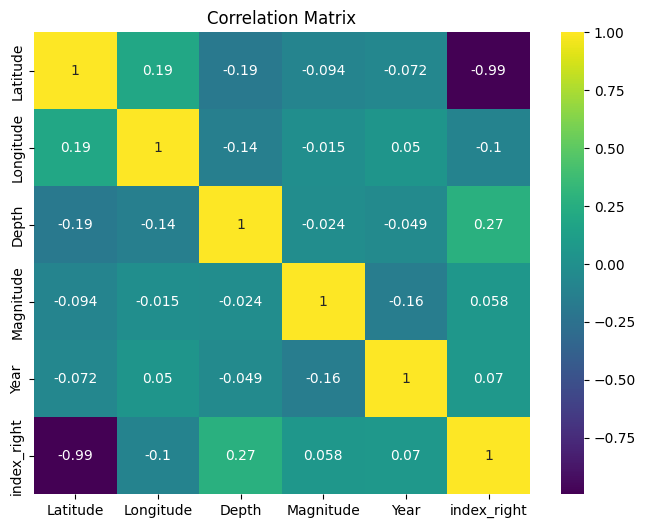

In [13]:
# Exploratory Data Analysis (EDA)

# 1. Missing values check
print("\nMissing values per column:")
print(eq_with_soil.isna().sum())

# 2. Correlation heatmap (numerical variables only)
plt.figure(figsize=(8,6))
sns.heatmap(eq_with_soil[['Magnitude','Depth']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Magnitude vs Depth)")
plt.show()

# 3. Magnitude histogram
plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Magnitude'], bins=40, kde=True, color="blue")
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

# 4. Depth distribution
plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Depth'], bins=40, kde=True, color="green")
plt.title("Earthquake Depth Distribution")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

# 5. Magnitude vs Depth scatter (colored by soil type)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=eq_with_soil.sample(5000, random_state=42),  # sample for clarity
    x="Depth", y="Magnitude", hue="DOMSOI", alpha=0.6, s=30, legend=False
)
plt.title("Magnitude vs Depth by Soil Type")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

# 6. Top N soil types vs Magnitude
top_soils = eq_with_soil['DOMSOI'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(
    data=eq_with_soil[eq_with_soil['DOMSOI'].isin(top_soils)],
    x="DOMSOI", y="Magnitude"
)
plt.title("Magnitude Distribution for Top 10 Soil Types")
plt.xticks(rotation=45)
plt.show()

# 7. Map: magnitude intensity
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
soil_data.plot(ax=ax, color="lightgrey", alpha=0.3)
eq_with_soil.plot(
    ax=ax,
    column="Magnitude",
    cmap="Reds",
    markersize=10,
    alpha=0.6,
    legend=True
)
ax.set_title("Earthquake Locations Colored by Magnitude")
plt.show()

# Convert 'Date' column to datetime if not already
eq_with_soil['Date'] = pd.to_datetime(eq_with_soil['Date'])

# Earthquakes over time
plt.figure(figsize=(12,6))
eq_with_soil.set_index('Date').resample('M')['Magnitude'].count().plot()
plt.title("Monthly Earthquake Frequency")
plt.ylabel("Number of Earthquakes")
plt.xlabel("Time")
plt.show()

# Average magnitude over time
plt.figure(figsize=(12,6))
eq_with_soil.set_index('Date').resample('M')['Magnitude'].mean().plot(color="red")
plt.title("Average Earthquake Magnitude Over Time")
plt.ylabel("Average Magnitude")
plt.xlabel("Time")
plt.show()

# Correlation across
plt.figure(figsize=(8,6))
sns.heatmap(eq_with_soil.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()


API dataset columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source']
Historical dataset columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source']
Common columns available: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source']

Date column types before conversion:
df_api Date type: datetime64[ns]
df_hist Date type: datetime64[ns]
Failed date conversions in df_api: 0
Failed date conversions in df_hist: 0
df_api Date type after conversion: datetime64[ns]
df_hist Date type after conversion: datetime64[ns]

Unified dataset shape: (149117, 7)
Data sources distribution:
Source
Historical    148625
API              492
Name: count, dtype: int64

First few rows:
                 Date  Latitude  Longitude  Depth  Magnitude  \
0 1970-01-01 17:11:00   -29.400   -177.169   35.0        5.6   
1 1970-01-04 17:00:41    24.185    102.543   11.3        7.1   
2 1970-01-05 11:49:10    23.984    102.732   15.0        5.9   

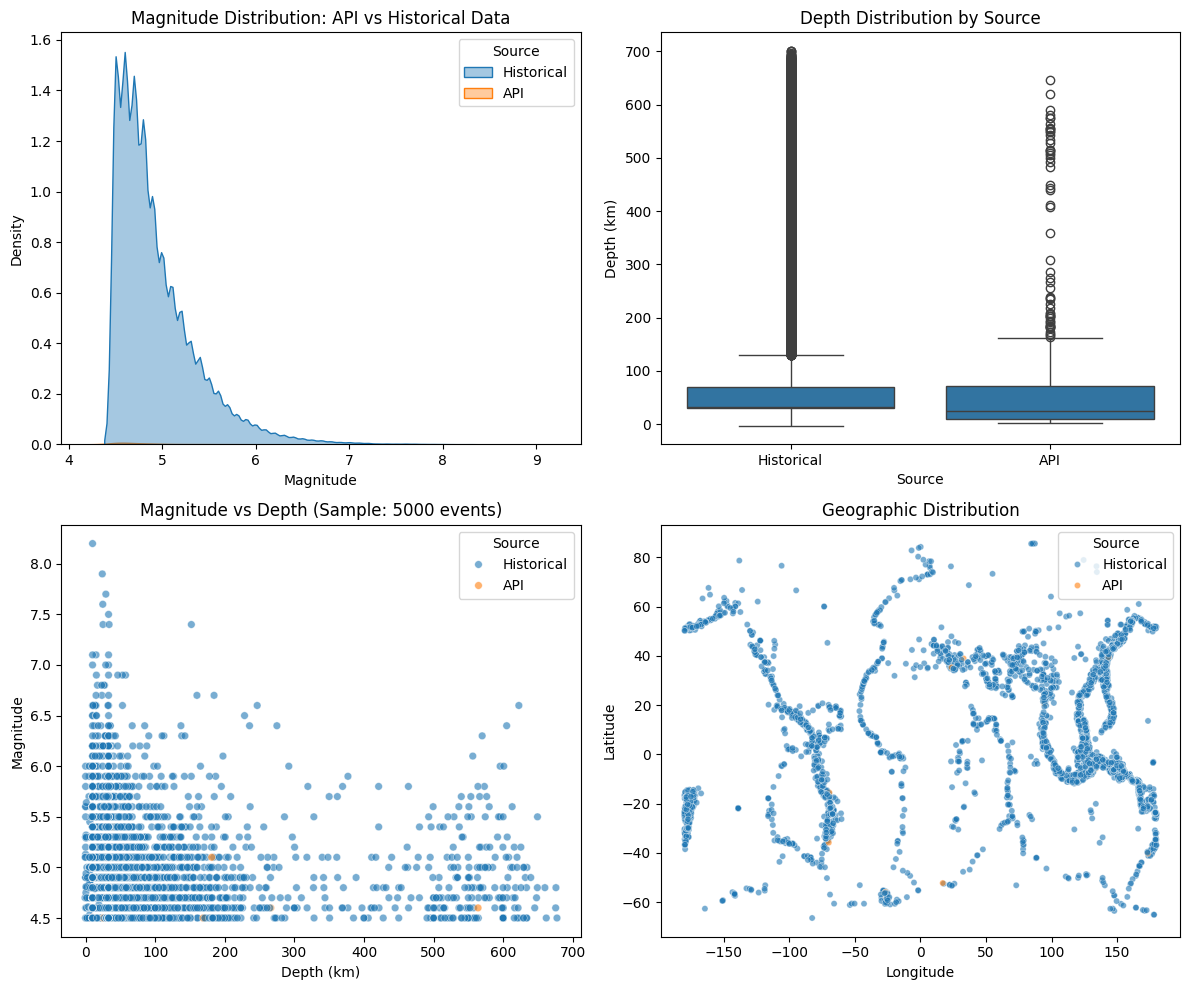

Date column type before Year extraction: datetime64[ns]


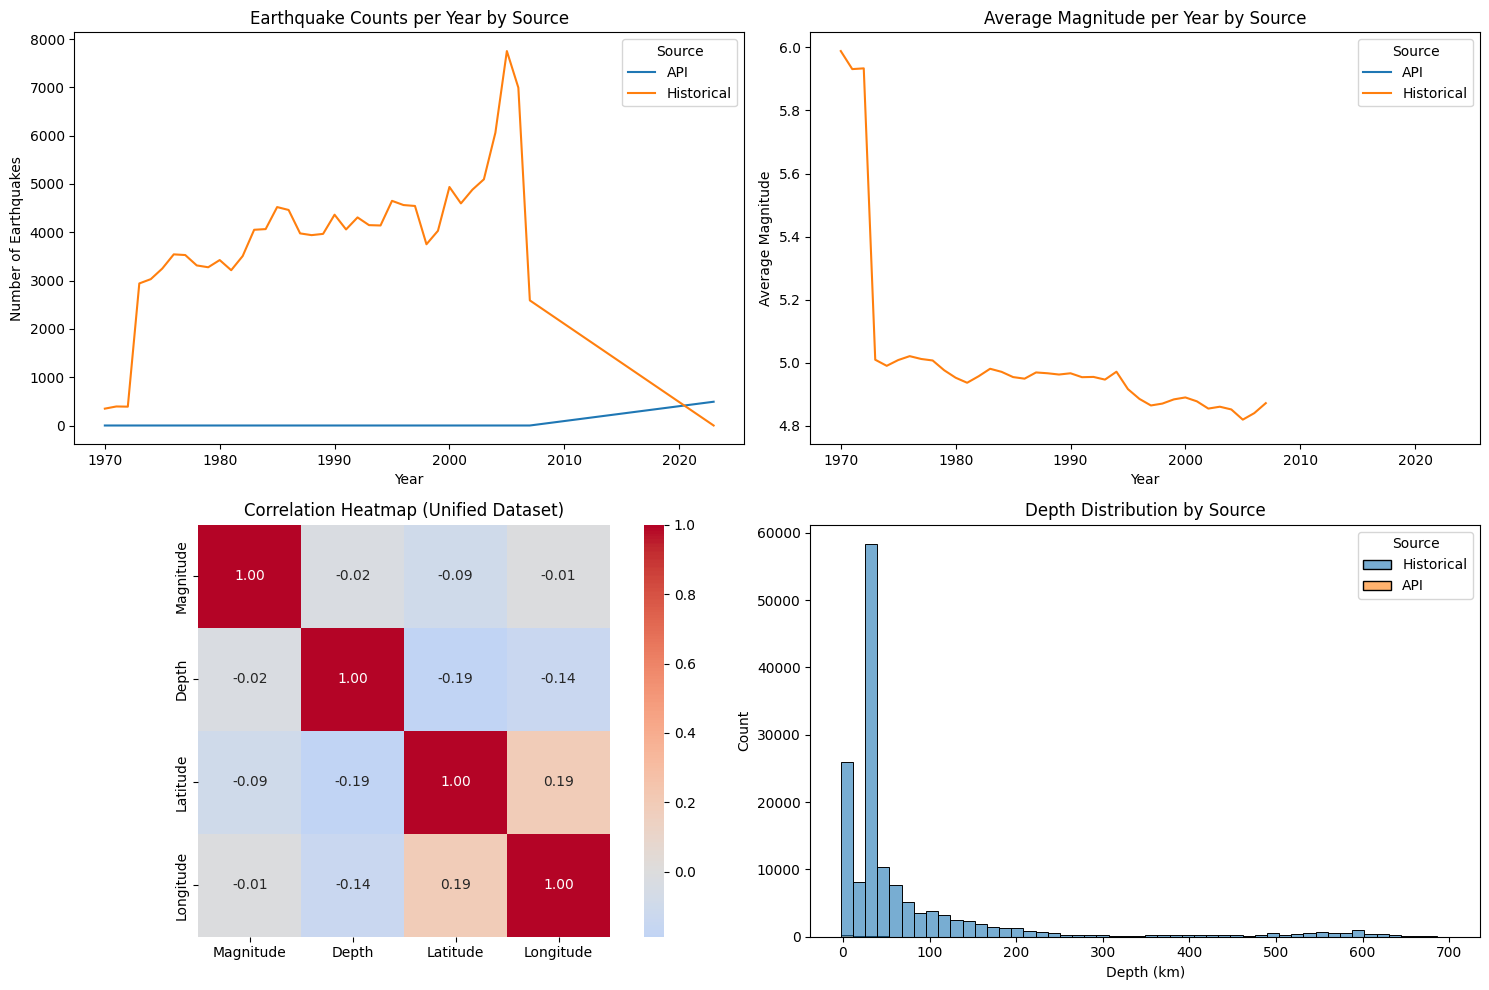

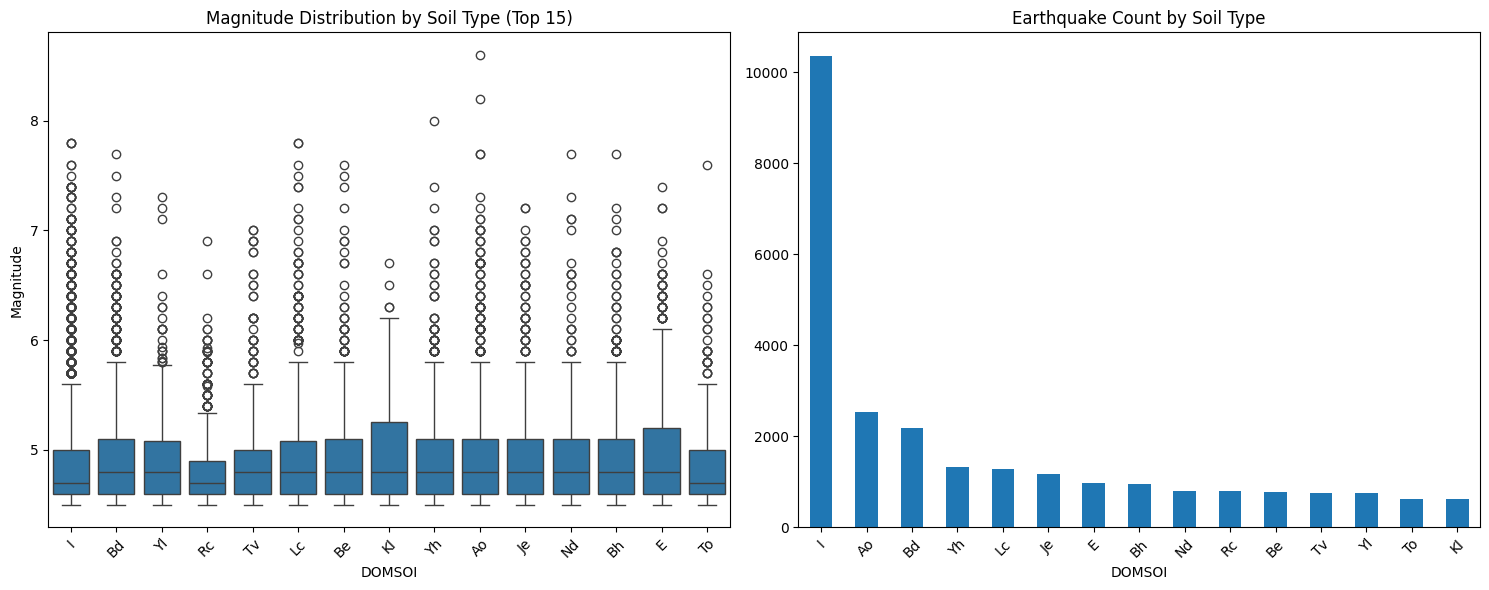


=== SOIL TYPE ANALYSIS ===
       Magnitude                  Depth         
           count   mean    std     mean      std
DOMSOI                                          
Af           312  4.914  0.466   39.274   50.164
Ag            19  4.842  0.217   35.458   28.920
Ah           466  4.922  0.449   59.325   52.033
Ao          2530  4.908  0.433   67.495   65.810
Ap            83  5.022  0.543  231.635  244.158
Bc           299  4.872  0.423   57.790   65.506
Bd          2178  4.940  0.436   59.691   51.843
Be           783  4.904  0.451   38.131   46.772
Bf           115  4.874  0.404   70.677   39.188
Bg           193  4.928  0.476   63.199   66.935


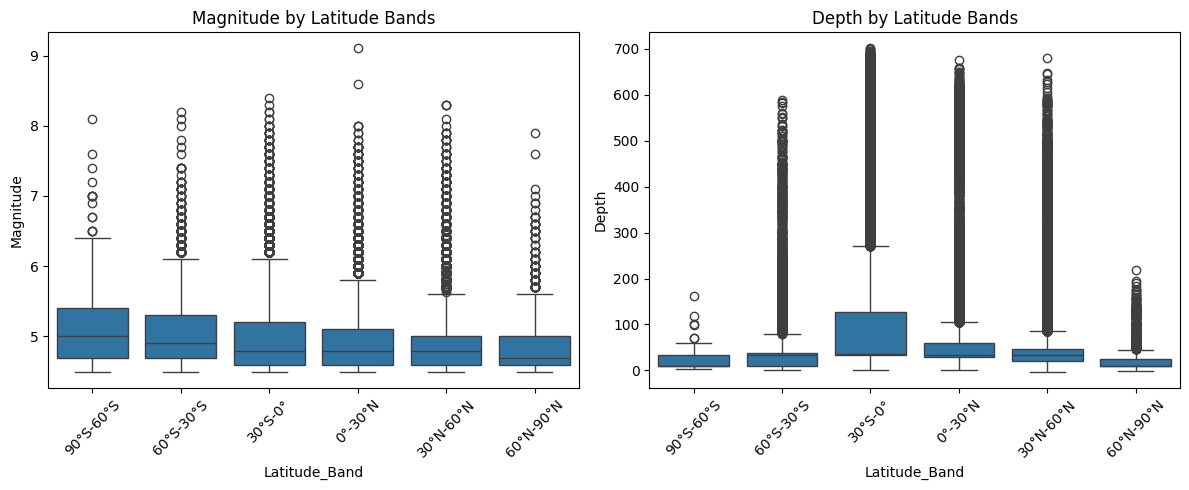


=== UNIFIED DATASET SUMMARY ===
Total earthquakes: 149,117
Time range: 1970-01-01 17:11:00 to 2023-08-31 21:43:25.888000
Geographic range: Lat(-83.9 to 87.2)
                 Lon(-180.0 to 180.0)
Magnitude range: 4.5 to 9.1
Depth range: -2.5 to 700.5 km

=== DATA QUALITY CHECK ===
Missing values per column:
Date                  0
Latitude              0
Longitude             0
Depth                 0
Magnitude             0
Location              0
Source                0
merge_id              0
DOMSOI           112729
Year                  0
Latitude_Band         0
dtype: int64

Soil data coverage: 24.4%

Unified dataset saved to: unified_earthquake_data.csv


In [17]:
# Merge datasets and save final data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os # Import os module

# --- Step 1. Align API + Historical datasets ---
print("API dataset columns:", df_api.columns.tolist())
print("Historical dataset columns:", df_hist.columns.tolist())

# Fix the column naming issue
df_api = df_api.rename(columns={
    "time": "Date",
    "latitude": "Latitude",
    "longitude": "Longitude",
    "depth": "Depth",
    "magnitude": "Magnitude",
    "place": "Location"
})

# Add source identifiers
df_api["Source"] = "API"
df_hist["Source"] = "Historical"

# Handle missing 'Location' column if it doesn't exist in df_api
if 'Location' not in df_api.columns:
    df_api['Location'] = "Unknown"

# Keep consistent columns (ensure they exist in both datasets)
available_common_cols = []
for col in ["Date", "Latitude", "Longitude", "Depth", "Magnitude", "Location", "Source"]:
    if col in df_api.columns and col in df_hist.columns:
        available_common_cols.append(col)

print("Common columns available:", available_common_cols)

df_api = df_api[available_common_cols]
df_hist = df_hist[available_common_cols]

# --- Step 2. Fix timezone compatibility issue ---
print("\nDate column types before conversion:")
print(f"df_api Date type: {df_api['Date'].dtype}")
print(f"df_hist Date type: {df_hist['Date'].dtype}")

# Convert both to timezone-naive datetime to avoid conflicts
df_api['Date'] = pd.to_datetime(df_api['Date'], errors='coerce')
df_hist['Date'] = pd.to_datetime(df_hist['Date'], errors='coerce')

# If historical data has timezone info, remove it
if df_hist['Date'].dtype == 'datetime64[ns, UTC]':
    df_hist['Date'] = df_hist['Date'].dt.tz_localize(None)

# Check for any failed conversions
print(f"Failed date conversions in df_api: {df_api['Date'].isna().sum()}")
print(f"Failed date conversions in df_hist: {df_hist['Date'].isna().sum()}")

# Remove rows with invalid dates
df_api = df_api.dropna(subset=['Date'])
df_hist = df_hist.dropna(subset=['Date'])

print(f"df_api Date type after conversion: {df_api['Date'].dtype}")
print(f"df_hist Date type after conversion: {df_hist['Date'].dtype}")

# --- Step 3. Merge both datasets ---
df_all = pd.concat([df_hist, df_api], ignore_index=True)

print("\nUnified dataset shape:", df_all.shape)
print("Data sources distribution:")
print(df_all['Source'].value_counts())
print("\nFirst few rows:")
print(df_all.head())
print(f"Unified Date type: {df_all['Date'].dtype}")

# --- Step 4. Attach Soil/Geological Data ---
# Create a unique identifier for merging
df_all['merge_id'] = df_all['Latitude'].round(3).astype(str) + '_' + df_all['Longitude'].round(3).astype(str)

# Prepare soil data with same identifier
if 'eq_with_soil' in globals():
    eq_with_soil['merge_id'] = eq_with_soil['Latitude'].round(3).astype(str) + '_' + eq_with_soil['Longitude'].round(3).astype(str)

    # Merge soil data
    df_all_geo = pd.merge(
        df_all,
        eq_with_soil[['merge_id', 'DOMSOI']].drop_duplicates(),
        on='merge_id',
        how='left'
    )
else:
    print("Soil data not available, proceeding without it")
    df_all_geo = df_all.copy()
    df_all_geo['DOMSOI'] = np.nan

print("\nUnified dataset with soil shape:", df_all_geo.shape)
print("Soil data coverage:", df_all_geo['DOMSOI'].notna().sum(), "out of", len(df_all_geo))
print("\nSample of unified dataset:")
print(df_all_geo.sample(5))

# --- Step 5. Comprehensive Exploratory Data Analysis Across Sources ---

# 1. Basic statistics by source
print("\n=== BASIC STATISTICS BY SOURCE ===")
print(df_all_geo.groupby('Source').agg({
    'Magnitude': ['count', 'mean', 'std', 'min', 'max'],
    'Depth': ['mean', 'std', 'min', 'max'],
    'Latitude': ['mean', 'std'],
    'Longitude': ['mean', 'std']
}).round(3))

# 2. Distribution plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df_all_geo, x="Magnitude", hue="Source", fill=True, alpha=0.4)
plt.title("Magnitude Distribution: API vs Historical Data")
plt.xlabel("Magnitude")

plt.subplot(2, 2, 2)
sns.boxplot(data=df_all_geo, x="Source", y="Depth")
plt.title("Depth Distribution by Source")
plt.ylabel("Depth (km)")

plt.subplot(2, 2, 3)
sample_size = min(5000, len(df_all_geo))
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Depth", y="Magnitude", hue="Source", alpha=0.6, s=30)
plt.title(f"Magnitude vs Depth (Sample: {sample_size} events)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Longitude", y="Latitude", hue="Source", alpha=0.6, s=20)
plt.title("Geographic Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()

# 6. Time-based analysis (now that dates are properly formatted)
# Double-check date type before extracting year
print(f"Date column type before Year extraction: {df_all_geo['Date'].dtype}")

# If still not datetime, force conversion
if not pd.api.types.is_datetime64_any_dtype(df_all_geo['Date']):
    df_all_geo['Date'] = pd.to_datetime(df_all_geo['Date'], errors='coerce')
    # Remove any rows with invalid dates
    df_all_geo = df_all_geo.dropna(subset=['Date'])

df_all_geo['Year'] = df_all_geo['Date'].dt.year

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
yearly_counts = df_all_geo.groupby(['Year', 'Source']).size().unstack(fill_value=0)
yearly_counts.plot(kind='line', ax=plt.gca())
plt.title("Earthquake Counts per Year by Source")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.legend(title="Source")

plt.subplot(2, 2, 2)
yearly_magnitude = df_all_geo.groupby(['Year', 'Source'])['Magnitude'].mean().unstack()
yearly_magnitude.plot(kind='line', ax=plt.gca())
plt.title("Average Magnitude per Year by Source")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.legend(title="Source")

plt.subplot(2, 2, 3)
correlation_data = df_all_geo[['Magnitude', 'Depth', 'Latitude', 'Longitude']].corr()
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", center=0,
            square=True, fmt=".2f")
plt.title("Correlation Heatmap (Unified Dataset)")

plt.subplot(2, 2, 4)
sns.histplot(data=df_all_geo, x='Depth', hue='Source', bins=50, alpha=0.6)
plt.title("Depth Distribution by Source")
plt.xlabel("Depth (km)")

plt.tight_layout()
plt.show()

# 7. Soil type analysis (if available)
if df_all_geo['DOMSOI'].notna().sum() > 0:
    plt.figure(figsize=(15, 6))

    top_soils = df_all_geo['DOMSOI'].value_counts().head(15).index
    soil_data_subset = df_all_geo[df_all_geo['DOMSOI'].isin(top_soils)]

    plt.subplot(1, 2, 1)
    sns.boxplot(data=soil_data_subset, x="DOMSOI", y="Magnitude")
    plt.title("Magnitude Distribution by Soil Type (Top 15)")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    soil_counts = soil_data_subset['DOMSOI'].value_counts()
    soil_counts.plot(kind='bar')
    plt.title("Earthquake Count by Soil Type")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    print("\n=== SOIL TYPE ANALYSIS ===")
    soil_stats = df_all_geo.groupby('DOMSOI').agg({
        'Magnitude': ['count', 'mean', 'std'],
        'Depth': ['mean', 'std']
    }).round(3)
    print(soil_stats.head(10))

# 8. Advanced spatial analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_all_geo['Latitude_Band'] = pd.cut(df_all_geo['Latitude'],
                                    bins=np.arange(-90, 91, 30),
                                    labels=['90°S-60°S', '60°S-30°S', '30°S-0°',
                                           '0°-30°N', '30°N-60°N', '60°N-90°N'])
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Magnitude')
plt.title("Magnitude by Latitude Bands")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Depth')
plt.title("Depth by Latitude Bands")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 9. Summary statistics for the unified dataset
print("\n=== UNIFIED DATASET SUMMARY ===")
print(f"Total earthquakes: {len(df_all_geo):,}")
print(f"Time range: {df_all_geo['Date'].min()} to {df_all_geo['Date'].max()}")
print(f"Geographic range: Lat({df_all_geo['Latitude'].min():.1f} to {df_all_geo['Latitude'].max():.1f})")
print(f"                 Lon({df_all_geo['Longitude'].min():.1f} to {df_all_geo['Longitude'].max():.1f})")
print(f"Magnitude range: {df_all_geo['Magnitude'].min():.1f} to {df_all_geo['Magnitude'].max():.1f}")
print(f"Depth range: {df_all_geo['Depth'].min():.1f} to {df_all_geo['Depth'].max():.1f} km")

# 10. Data quality check
print("\n=== DATA QUALITY CHECK ===")
print("Missing values per column:")
print(df_all_geo.isnull().sum())
print(f"\nSoil data coverage: {df_all_geo['DOMSOI'].notna().mean():.1%}")

# Create the directory if it doesn't exist
output_dir = '/content/drive/MyDrive/dataset'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Save the unified dataset for future use
df_all_geo.to_csv(os.path.join(output_dir, 'unified_earthquake_data.csv'), index=False)
print("\nUnified dataset saved to: unified_earthquake_data.csv")

In [18]:
#Preprocessing
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dataset/unified_earthquake_data.csv")

print("Missing values:")
print(df.isnull().sum())

num_cols = ['Magnitude', 'Depth']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical: fill with mode
cat_cols = ['Location', 'DOMSOI']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save intermediate version
df.to_csv("/content/drive/MyDrive/dataset/earthquake_cleaned_day1.csv", index=False)


Missing values:
Date                  0
Latitude              0
Longitude             0
Depth                 0
Magnitude             0
Location              0
Source                0
merge_id              0
DOMSOI           112729
Year                  0
Latitude_Band         0
dtype: int64

Missing values after imputation:
Date             0
Latitude         0
Longitude        0
Depth            0
Magnitude        0
Location         0
Source           0
merge_id         0
DOMSOI           0
Year             0
Latitude_Band    0
dtype: int64


In [19]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_cleaned_day1.csv")

# Select numeric features
numeric_features = ['Magnitude', 'Depth']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df_scaled[numeric_features].describe())

# Save scaled dataset
df_scaled.to_csv("/content/drive/MyDrive/dataset/earthquake_scaled_day2.csv", index=False)


          Magnitude         Depth
count  1.491170e+05  1.491170e+05
mean  -4.189389e-16 -2.325321e-17
std    1.000003e+00  1.000003e+00
min   -9.945213e-01 -6.637913e-01
25%   -7.643567e-01 -4.029216e-01
50%   -3.040276e-01 -3.726070e-01
75%    3.864662e-01 -6.946068e-02
max    9.593049e+00  5.096316e+00


In [20]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_scaled_day2.csv")

# Encode Soil Type (DOMSOI)
if 'DOMSOI' in df.columns:
    encoder = LabelEncoder()
    df['SoilType_Encoded'] = encoder.fit_transform(df['DOMSOI'])
else:
    df['SoilType_Encoded'] = -1  # fallback if missing

# Encode Location (optional, may be too high-cardinality)
df['Location_Encoded'] = LabelEncoder().fit_transform(df['Location'])

print(df[['DOMSOI', 'SoilType_Encoded']].head())

# Save encoded dataset
df.to_csv("/content/drive/MyDrive/dataset/earthquake_encoded_day3.csv", index=False)


  DOMSOI  SoilType_Encoded
0      I                42
1     Af                 0
2     Af                 0
3      I                42
4      I                42


In [21]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_encoded_day3.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
print(df.head())


                 Date  Latitude  Longitude     Depth  Magnitude  \
0 1970-01-01 17:11:00   -29.400   -177.169 -0.356221   1.537289   
1 1970-01-04 17:00:41    24.185    102.543 -0.550398   4.989758   
2 1970-01-05 11:49:10    23.984    102.732 -0.520084   2.227783   
3 1970-01-06 05:35:54    -9.583    151.493 -0.520084   3.148441   
4 1970-01-07 07:56:14    15.785    -59.808 -0.342292   2.457947   

                              Location      Source        merge_id DOMSOI  \
0        Kermadec Islands, New Zealand  Historical  -29.4_-177.169      I   
1                        Yunnan, China  Historical  24.185_102.543     Af   
2                        Yunnan, China  Historical  23.984_102.732     Af   
3       D'Entrecasteaux Islands region  Historical  -9.583_151.493      I   
4  east of Guadeloupe, Leeward Islands  Historical  15.785_-59.808      I   

   Year Latitude_Band  SoilType_Encoded  Location_Encoded  Month  Day  Hour  
0  1970       30°S-0°                42               99

In [22]:
#Feature Engineering
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_encoded_day3.csv")

# 1. Magnitude Category
df['Magnitude_Class'] = pd.cut(
    df['Magnitude'],
    bins=[0, 4, 6, 7, 10],
    labels=['Low', 'Moderate', 'Strong', 'Major']
)

# 2. Depth Category
df['Depth_Class'] = pd.cut(
    df['Depth'],
    bins=[-1, 70, 300, 700],
    labels=['Shallow', 'Intermediate', 'Deep']
)

# 3. Risk Score (simple weighted sum)
df['Risk_Score'] = (
    (df['Magnitude'] * 0.7) +
    (np.log1p(df['Depth']) * 0.3)
)

# 4. Spatial Clusters
coords = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Region_Cluster'] = kmeans.fit_predict(coords)

print(df[['Magnitude', 'Depth', 'Risk_Score', 'Region_Cluster']].head())

# Save engineered dataset
df.to_csv("/content/drive/MyDrive/dataset/earthquake_features_day4.csv", index=False)


   Magnitude     Depth  Risk_Score  Region_Cluster
0   1.537289 -0.356221    0.943983               1
1   4.989758 -0.550398    3.253012               0
2   2.227783 -0.520084    1.339205               0
3   3.148441 -0.520084    1.983666               4
4   2.457947 -0.342292    1.594865               2


In [23]:
# Load latest version
df_final = pd.read_csv("/content/drive/MyDrive/dataset/earthquake_features_day4.csv")

print("Final dataset shape:", df_final.shape)
print("Final columns:", df_final.columns.tolist())

# Save final dataset for modeling
df_final.to_csv("/content/drive/MyDrive/dataset/earthquake_preprocessed_week2.csv", index=False)


Final dataset shape: (149117, 17)
Final columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source', 'merge_id', 'DOMSOI', 'Year', 'Latitude_Band', 'SoilType_Encoded', 'Location_Encoded', 'Magnitude_Class', 'Depth_Class', 'Risk_Score', 'Region_Cluster']
